# **<p style="text-align: center;"> Case Poker </p>**
### <p style="text-align: center;"> Enzo Marcano & Emily Muller-Foster </p>
## **Abstract**
>Poker is a predictable game. In this paper, we examine the probability your dealt hand will win the flop (first three community cards) in Texas Hold'em Poker using Hypergeometries, Joint Distributions, Bayes' Rule, and Conditional Probabilities. Due to the density of this expedition, we will center this paper around the idea that your opponents having lower cards than your maximum card is an indicator of winning, how this probability is applied to the probability of an upcoming poker hand, and how the data supports the hypothesis.

## **Method**
#### What it means to win
7-card poker is a very complex game and calculating the true probabilities that an event will happen at any point in the game is no easy task and perhaps one that should be left up to frequency analysis. In order to build a foundation for any sort of mechanism to predict whether a hand will win or not, assumptions must be made. Our hypothesis is that the probability that all other players have lower cards than you and don't have pocket pairs (same two cards dealt to you) is an indicator of your likelihood of winning any poker hand. And by assuming this hypothesis, calculating poker hands probabilities given the hypothesis is synonymous with the probability that not only will you make the poker hand but win it as well.

We start with the case where you are dealt distinct cards. Assuming that you are always dealt to first, the probability that the next n-1 players will be dealt cards lower than your highest card is the hypergeometry:
#### $$A = \forall x_{0<m<n},x_m<\max(x_0,x_n) \\  P(A)=\frac{\binom{4*\max(x_0,x_n)-1}{n-1}}{\binom{50}{n-1}}$$
Where x is the index of your card and the max returns its rank ( ie. {Two of Clubs, Ace of Hearts} &rarr; {0,25} &rarr; {0,12} ). The order of the actual dealing doesn't matter in the grand scheme of the probability but it makes calculating the odds that other players didn't get pocket pairs much easier. To summarize the above formula:
>First assume you already know what your two cards will be. After being dealt one card, n-1 cards will be dealt from the remaining deck. Of those 50, there are four times the rank of your highest card minus one (due to your minimum card) cards left which are lower in rank than your highest ranked card. You want the next n-1 deals to be from this portion of the deck and none to be from the rest.

After n-1 players are dealt, you are dealt to again. In order for you to have the best hand coming out of the deal, everyone must have lower cards than your highest card and no one besides you can have pocket pairs. Lets examine this one player at a time:
#### $$B = \text{ The card } x_{m-n} \text{ was dealt i times } \\ C = (\forall x_{n+1<m<2n-1},x_m<\max\{x_0,x_n\}) \land x_m \neq x_{m-n} \\~\\ P[(C | (B|A)]P(B|A) = \prod_{j=1}^{n-1}\sum_{i=1}^{4} \frac{\binom{4*\max(x_0,x_{n})+ i - j - n-3}{1}}{\binom{52-n-j}{1}}*\frac{\binom{4}{i}\binom{4\max(x_0,x_n)- 4}{n+j-i-1}}{\binom{51}{n+j-1}}$$

To summarize:
>Deal n+j for j > 0 is limited to the cards less than your max minus minus the previous dealings, minus the cards that cannot be dealt, and plus the number of times the card has been dealt. Then, at deal n+j, j-1 additional cards have been dealt so subtract that as well. And this is from 52 minus the first n deals minus the additional deals at deal n+j.
For the condition, start from deal 2 and calculate the probability that the card which cannot come has been dealt i times given all other deals except one are lower than your max card.

Now we have that:
#### $$P(\text{You have the best hand at the deal}) = P[C|(B|A)]P(B|A)P(A)$$

For pocket pairs, it is straight forward:
#### $$P(\text{You have the best hand at the deal})=\frac{\binom{4\max(x_0,x_n)}{2n-2}}{\binom{50}{2n-2}}$$

From here, the probability that you will make a poker hand at the flop given that you have the best hand is calculated for each poker hand. Several calculations, such as the straight, are joint distributions.

#### Pair on the flop
$$P(\text{Highest card makes pair on flop})=\sum_{i = 1}^{4}3\frac{\binom{52-2n-7+i}{2}}{\binom{52-2n}{3}}*\frac{\binom{4}{i}\binom{4\max(x_0,x_n)-4}{2(n-1)-i}}{\binom{50}{2(n-1)}}$$

$$$$

#### Scoring
We now have all the probabilities that you will make a poker hand on the flop and that you have the best hand (and thus, hypothetically, the probability you will win). The probability that you will win any hand is the sum of all of those probabilities. But this would mean doing a very nasty inclusion-exlcusion calculation. In order to circumvent this, a score system can be devised:
#### $$p_{\text{over count}} = P(\text{You have the best hand at the deal}) * \sum_{\text{ph } \in \text{ Poker Hands}}P(\text{ph on the flop } | \text{ You have the best hand at the deal}) \\ p_{\text{over count}} = \log(p_{\text{over count}}) \\~\\ score = -|\max_{y_0,y_1}(p_\text{over count}) - p_{\text{over count}}| \text{ for }y\in\text{deck}$$
Since each change in card results in large changes in p<sub>over count</sub>, taking the log allows for better paritioning of good and bad scores. By creating a score, the value of your hand is able to be derived.
#### Testing
In order to be able to test our hypothesis, we created a poker simulation which can be evaluated at any point in the game. For the purposes of this paper, we will evaluate each poker game no further than the flop. If our hypothesis is true, then we should expect that scores are close to zero when we win and vice versa when we lose. To test our hypothesis, we simulated several sets of 10k poker games (evaluating who won after the flop) and separated the wins from the loses. Finally, we take that data and do another set of simulations where the player only continues to the flop at a score cutoff which should hypothetically generate more wins than loses.
## **Results**
#### Comparative Analysis

| Number Of Players: 8| WIN DATA            | LOSS DATA           |
| -----               | --------            | ---------           |
|Average              | -17.29892800954541  | -25.050975245356693 |
|Median               | -12.119796959609957 | -16.92201201536304  |
|Mode                 | -4.01159677         |  -62.78603546       |
|Mode Count           | 87                  | 816                 |
|Mode Composition     | 0.0628158844765343  | 0.09471851421938479 |
|Count                | 1385                | 8615                |

<p float="left">
  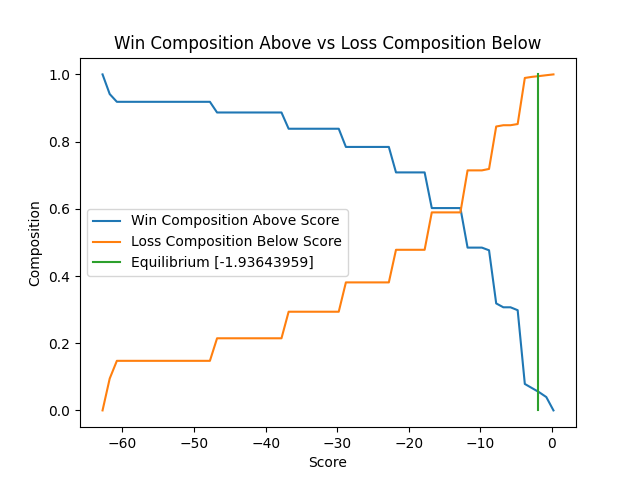
  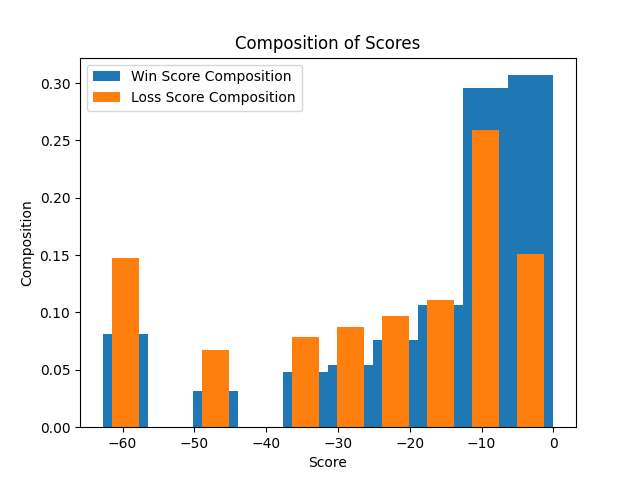 
</p>

| Number Of Players: 3| WIN DATA            | LOSS DATA            |
| -----               | --------            | ---------            |
|Average              | -3.117757327053543  | -3.791006074051893  |
|Median               | -2.3357682547441283 | -3.3177989556612197  |
|Mode                 | -1.5388194          |  -2.33576825         |
|Mode Count           | 286                 | 255                  |
|Mode Composition     | 0.06987539701930125 | 0.043169121381411886 |
|Count                | 4093                | 5907                 |

<p float="left">
  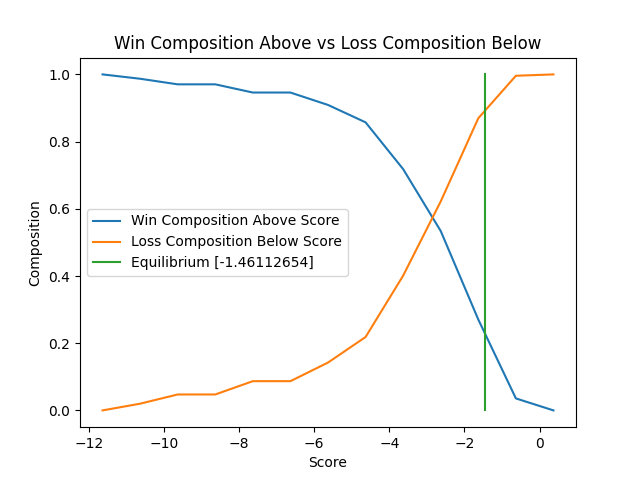
  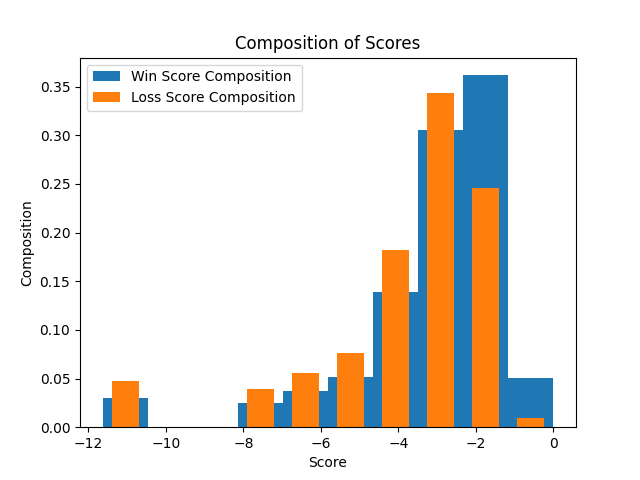
</p>

All of this data was evaluated at the flop. The first thing to note is the consistency of the data; The hypothesis does not lead to random results. Next, we can see that for both cases, the average for the win data is higher than the loss data along with the median. Right away, it can be seen that the modes are also expected from the hypothesis; The mode for the win data is higher than the loss data and a large portion of the loss data set is the mode. In the three player data, the mode decrease under losses aligns with the scaled changes in the other rows. Additionally, there seems to be a lot more diversity in the loss scores which is a sign of a skew in the scores. 

The graphs are also revealing. For the eight player simulation, most wins seem to happen at scores around -15 or greater while most losses occured at -15 or under. Out of all of the data, the score composition is the weirdest to us. The win compositions are skewed as expected. The loss composition did as well, but not as significantly as we would have thought. Our interpretation of this is that having an outstanding hand relative to the other players is actually very rare.
#### Testing the results

By fitting the data with polynomials, we can calculate the minimum score at which to play to win more flops than we lose. Since the distribution is discrete, there are jumps in the scores and thus the equilibrium line is actually within some tolerance. Usually you can play at slightly lower scores and basically achieve the same outcomes. The calculation for the equilibrium is to solve the following second order polynomial:
#### $$0= P_{\text{win above},2}(s) * \text{count}_{\text{win}} - P_{\text{loss above},2}(s) * \text{count}_{\text{loss}} $$
This formula can be derived by observing that if we only play at a specific score, then you will win the WIN DATA count times the win composition above the score and you will lose the LOSS DATA count times the loss composition above the score. Thus:
#### $$\frac{\text{count}_\text{win} * P_{\text{win above},2}(s)}{\text{count}_\text{loss} * P_{\text{loss above},2}(s)} >= 1$$
When we plug the equilibrium data into the simulations, we find that, when we play the flop, we win 64% and 78% of the time for eight and three players respectively. With that being said, you only play the flop 1.38% and 3.08% of the time respectively. From there, you can calculate your revenue expectation, but that is outside the scope of this paper.

## **Discussion**
#### What affects the score
The variables which cause the greatest disturbances in the score are the number of players, whether your cards are distinct or not, the highest rank of your cards, and how far your cards are from each other. 

When you decrease the number of players, the likelihood that the other players will have higher cards than yours decreases. And pretty significantly because you're almost always dealing with mono to tri variate joint distributions due to the fact that you must calculate the conditional that the card you need has been dealt. Conversely, when you increase the number of players, the score is damped significantly and many hands that seem high, such as 9 10 suited, won't even break -20. When the rank of your highest card increases, the numerators for almost every probability increases. 

When you have pocket pairs, you cut down on distributions by basically half and the score sky rockets. With that being said, pocket twos won't get you very far in a high player game.

Lastly, cards which are not the same suits do not have the possibility of making a flush. But this odds of this are already low. 

#### Two Player Games
Two player games is an interesting case worth mentioning because, assuming the starting position, you win more games than you lose. This results in a second equilibrium score at the lowest score attained. Playing the other equilibrium will yield more wins at the flop but you will play significantly less games. In otherwords, for two player games and disregarding money, you should almost always play.



In [14]:
%%html
<style>
table {float:left}
</style>